## Data Pre Processing

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
dataset=pd.read_csv('Position_Salaries.csv')

X=dataset.iloc[:, 1:2].values
Y=dataset.iloc[:, 2].values

# from sklearn.model_selection import train_test_split
# X_train, X_test, Y_train, Y_test= train_test_split(X, Y, test_size = 1/3, random_state = 0)


In [2]:
dataset

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [3]:
Y


array([  45000,   50000,   60000,   80000,  110000,  150000,  200000,
        300000,  500000, 1000000], dtype=int64)

In [4]:
X

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]], dtype=int64)

In [5]:
from sklearn.preprocessing import StandardScaler
sc_x=StandardScaler()
sc_y=StandardScaler()
X=sc_x.fit_transform(X)
Y = Y.reshape(-1,1)
Y=sc_y.fit_transform(Y)


### Fitting SVR to the dataset

In [6]:
from sklearn.svm import SVR
regressor=SVR(kernel="rbf")
regressor.fit(X, Y)

C:\Users\asitp\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


SVR()

In [10]:
y_pred= sc_y.inverse_transform(regressor.predict(sc_x.transform(np.array([[6.5]]))))
y_pred

array([170370.0204065])

In [13]:

# plt.scatter(X, Y, color='red')

# plt.plot(X, regressor.predict(X), color='blue')
# plt.title('Truth or Bluff (SVR))')
# plt.xlabel('Position Level')
# plt.ylabel('Salary')
# plt.show()

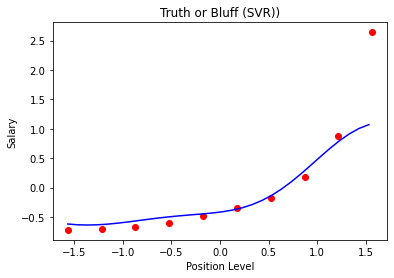

In [14]:
X_grid=np.arange(min(X), max(X), 0.1)
X_grid=X_grid.reshape(len(X_grid),1)
plt.scatter(X, Y, color='red')

# plt.plot(X, lin_reg2.predict(poly_reg.fit_transform(X)), color='blue')
plt.plot(X_grid, regressor.predict(X_grid), color='blue')
plt.title('Truth or Bluff (SVR))')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()